# Assignment: The Breast Cancer Data

Import the breast cancer data set using `read_csv`. Based on the code of this lesson, try to do the following:

- Get the summary (univariate) statistics of columns 2-10 (accessing indices 1:10) using `describe`
- Plot the means of each column as a bar chart with standard deviations as error bars. Why are some bars invisible?
- Extract the values as Numpy array using `to_numpy`. The shape of the array should be (569, 31).
- Calculate the correlation matrix using `corrcoef` from Numpy and plot it as a heatmap. The shape of the matrix should be (31, 31). Use `fill_diagonal` to set the diagonal elements to 0.
- Calculate the average column correlation and plot it as a bar chart.
- Calculate the average correlation strength of the data set.

In case of doubt, try to get help from the respective documentations for Pandas dataframes, Numpy and Matplotlib.


In [22]:
# To import pandas
import pandas as pd

# To import a dataset from scikit-learn
from sklearn import datasets

# To create figure environments and plots
from matplotlib.pyplot import subplots

# Specific numpy functions
import numpy as np


In [18]:
bc = pd.read_csv('data/breast_cancer.csv'); bc.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [19]:
bcd = bc.iloc[:, 1:10].describe(); print(bcd)

       radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

<BarContainer object of 9 artists>

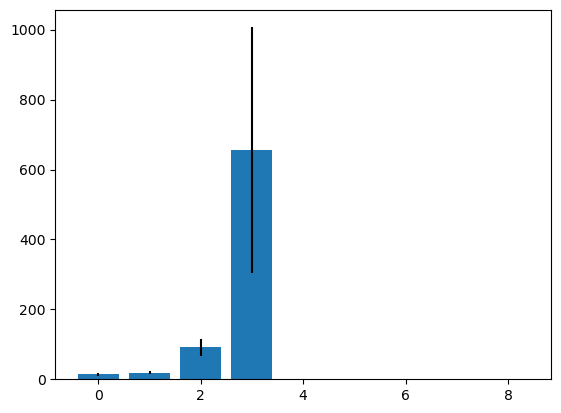

In [29]:
fig, ax = subplots(); bins = arange(bcd.shape[1]); ax.bar(bins, bcd.loc['mean'], yerr=bcd.loc['std'])

In [30]:
bcn = bc.to_numpy(); bcn.shape

(569, 31)

In [31]:
bcc = corrcoef(bcn, rowvar=False); bcc.shape

(31, 31)

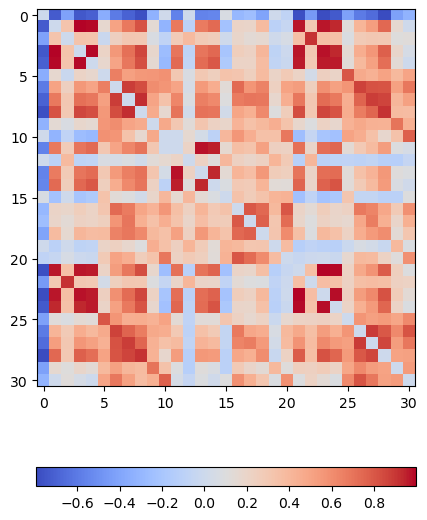

In [34]:
fill_diagonal(bcc, 0)
fig, ax = subplots(figsize=(7,7)); ac = ax.imshow(bcc, cmap='coolwarm')
fig.colorbar(ac, orientation='horizontal', shrink=0.7)

Text(0.5, 1.0, 'Average strength per column')

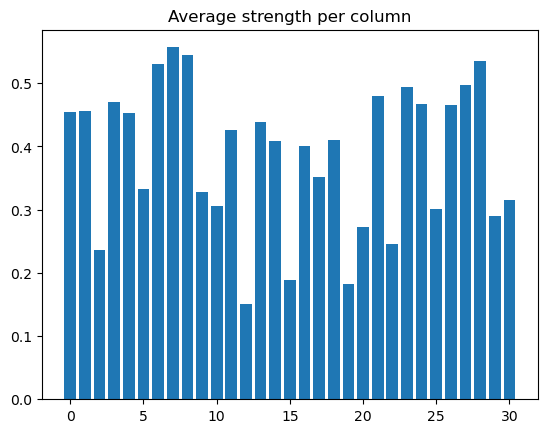

In [37]:
bcc_av = mean(abs(bcc), axis=0)
fig, ax = subplots(); bins = arange(len(bcc_av))
ax.bar(bins, bcc_av); ax.set_title('Average strength per column')

In [39]:
average = mean(abs(bcc)); print(average)

0.38686839868474676
